### 비지도학습

* 비지도 변환
 - PCA
 - tSNE
* 군집(Clustering)
 - K-means
 - DBSCAN

In [1]:
import mglearn

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


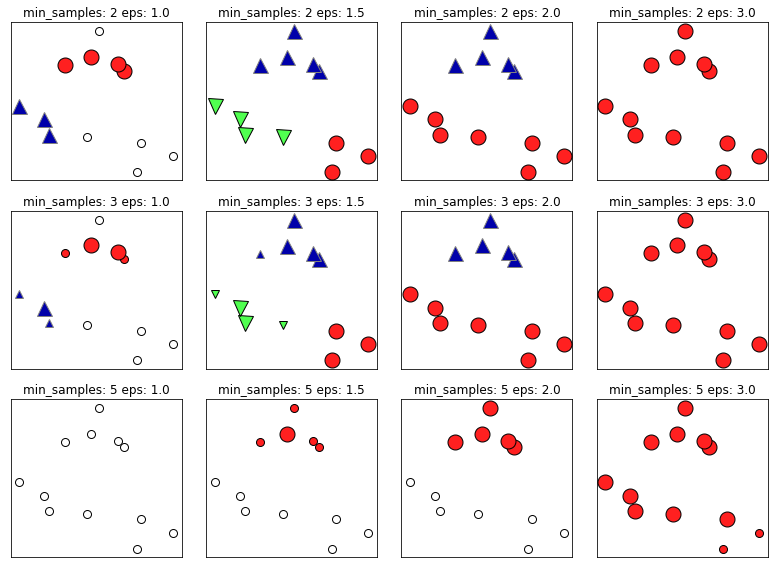

In [2]:
mglearn.plots.plot_dbscan()

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

In [4]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균 0, 분산 1이 되도록 데이터 스케일 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [5]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
clusters

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, '특성 1')

C:\Users\sonjuri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sonjuri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sonjuri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\sonjuri\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


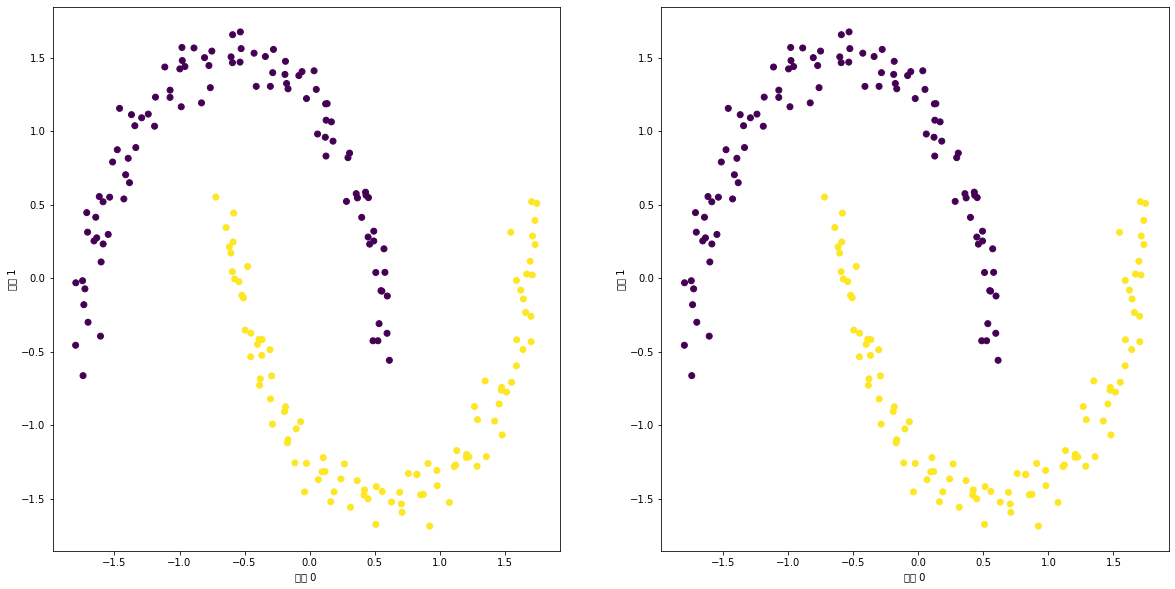

In [8]:
# 원래 데이터 그래프
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)   # 2행 1열에 첫번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2, c=y)  # 원본 샘플 데이터 
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# DBSCAN 적용한 그래프
plt.subplot(1,2,2)   # 2행 1열에 두번째 
f1 = X_scaled[:, 0]  # 특성 첫번째 선택
f2 = X_scaled[:, 1]  # 특성 두번째 선택
plt.scatter(f1, f2, c=clusters) # DBSCAN 적용한 샘플 데이터
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


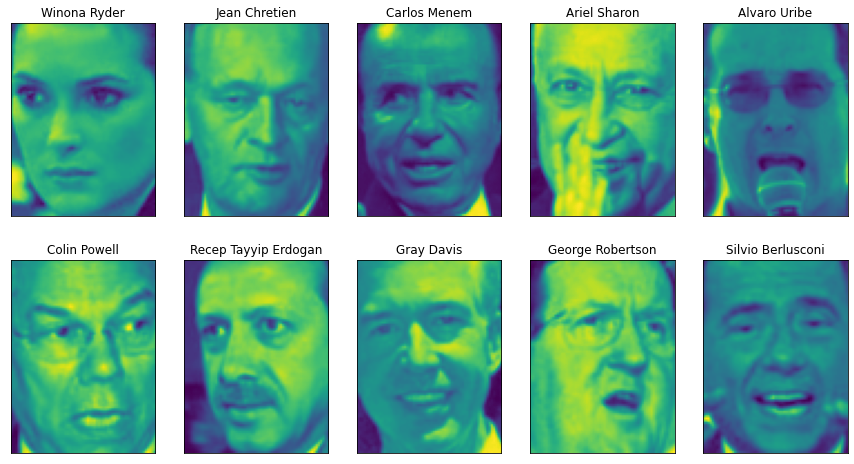

In [11]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [12]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.


In [13]:
# LFW 데이터에서 고유얼굴을 찾은 다음 데이터를 변환합니다
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [14]:
dbscan = DBSCAN() # eps=0.5, min_samples=5
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 : {}".format(np.unique(labels)))

고유한 레이블 : [-1]


In [15]:
dbscan = DBSCAN(min_samples=3) # eps=0.5, min_samples=3
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 : {}".format(np.unique(labels)))

고유한 레이블 : [-1]


### 실습 3-2
 * min_samples=__, eps=__  을 조정해서 각각의 고유한 레이블을 확인해 보자.


In [16]:
eps_list = [0.1, 0.5, 1, 3, 5, 7]
min_samples_list = [1, 3, 5, 7, 9]

for eps_one in eps_list:
    for min_one in min_samples_list:
        dbscan = DBSCAN(min_samples=min_one, eps=eps_one)
        print("eps: {}, min_samples: {}".format(eps_one, min_one))
        labels = dbscan.fit_predict(X_pca)
        print("고유한 레이블 : {}".format(np.unique(labels)))



eps: 0.1, min_samples: 1
고유한 레이블 : [   0    1    2 ... 2060 2061 2062]
eps: 0.1, min_samples: 3
고유한 레이블 : [-1]
eps: 0.1, min_samples: 5
고유한 레이블 : [-1]
eps: 0.1, min_samples: 7
고유한 레이블 : [-1]
eps: 0.1, min_samples: 9
고유한 레이블 : [-1]
eps: 0.5, min_samples: 1
고유한 레이블 : [   0    1    2 ... 2060 2061 2062]
eps: 0.5, min_samples: 3
고유한 레이블 : [-1]
eps: 0.5, min_samples: 5
고유한 레이블 : [-1]
eps: 0.5, min_samples: 7
고유한 레이블 : [-1]
eps: 0.5, min_samples: 9
고유한 레이블 : [-1]
eps: 1, min_samples: 1
고유한 레이블 : [   0    1    2 ... 2060 2061 2062]
eps: 1, min_samples: 3
고유한 레이블 : [-1]
eps: 1, min_samples: 5
고유한 레이블 : [-1]
eps: 1, min_samples: 7
고유한 레이블 : [-1]
eps: 1, min_samples: 9
고유한 레이블 : [-1]
eps: 3, min_samples: 1
고유한 레이블 : [   0    1    2 ... 2059 2060 2061]
eps: 3, min_samples: 3
고유한 레이블 : [-1]
eps: 3, min_samples: 5
고유한 레이블 : [-1]
eps: 3, min_samples: 7
고유한 레이블 : [-1]
eps: 3, min_samples: 9
고유한 레이블 : [-1]
eps: 5, min_samples: 1
고유한 레이블 : [   0    1    2 ... 2057 2058 2059]
eps: 5, min_samples: 3
고유한 

In [17]:
eps_list = [3, 5, 7, 10, 15, 20, 25]
min_samples_list = [2,3,5,7,9]

for eps_one in eps_list:
    for min_one in min_samples_list:
        dbscan = DBSCAN(min_samples=min_one, eps=eps_one)   # 5 -> 3
        print("eps : {}, min_samples : {}".format(eps_one, min_one) )
        labels = dbscan.fit_predict(X_pca)
        print("고유한 레이블 : {}".format(np.unique(labels)))


eps : 3, min_samples : 2
고유한 레이블 : [-1  0]
eps : 3, min_samples : 3
고유한 레이블 : [-1]
eps : 3, min_samples : 5
고유한 레이블 : [-1]
eps : 3, min_samples : 7
고유한 레이블 : [-1]
eps : 3, min_samples : 9
고유한 레이블 : [-1]
eps : 5, min_samples : 2
고유한 레이블 : [-1  0  1  2]
eps : 5, min_samples : 3
고유한 레이블 : [-1]
eps : 5, min_samples : 5
고유한 레이블 : [-1]
eps : 5, min_samples : 7
고유한 레이블 : [-1]
eps : 5, min_samples : 9
고유한 레이블 : [-1]
eps : 7, min_samples : 2
고유한 레이블 : [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
eps : 7, min_samples : 3
고유한 레이블 : [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
eps : 7, min_samples : 5
고유한 레이블 : [-1  0  1]
eps : 7, min_samples : 7
고유한 레이블 : [-1  0]
eps : 7, min_samples : 9
고유한 레이블 : [-1]
eps : 10, min_samples : 2
고유한 레이블 : [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23]
eps : 10, min_samples : 3
고유한 레이블 : [-1  0  1]
eps : 10, min_samples : 5
고유한 레이블 : [-1  0  1]
eps : 10, m

In [18]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블: {}".format(np.unique(labels)))


고유한 레이블: [-1  0]


In [19]:
# bincount는 음수를 받을 수 없어서 labels에 1을 더했습니다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수입니다.
print("클러스터별 포인트 수: {}".format(np.bincount(labels + 1)))


클러스터별 포인트 수: [  32 2031]


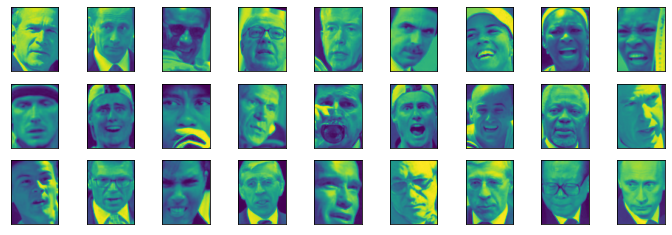

In [20]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, 
                         subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)


In [21]:
dbscan = DBSCAN(eps=7, min_samples=3)
labels = dbscan.fit_predict(X_pca)
np.unique(labels)


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

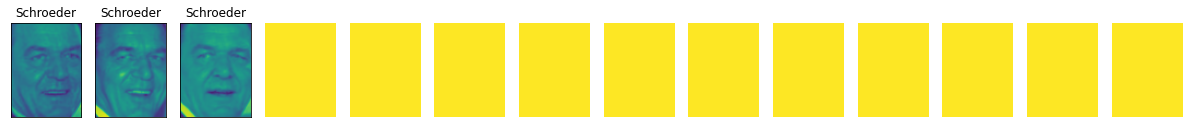

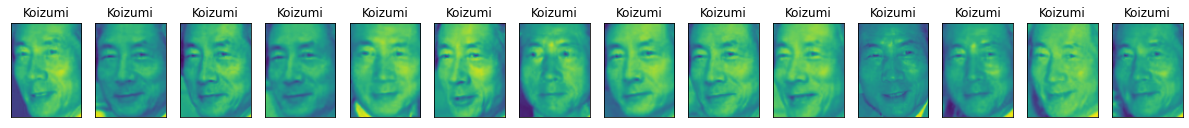

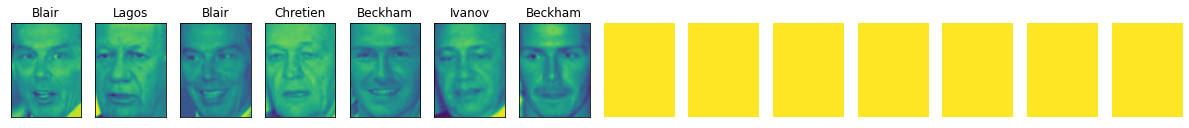

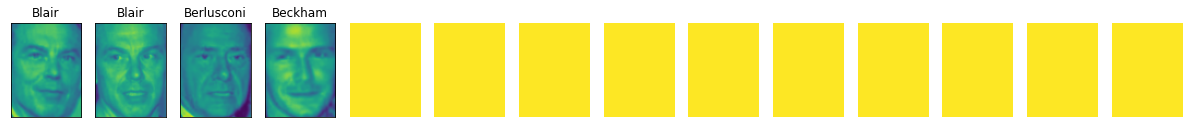

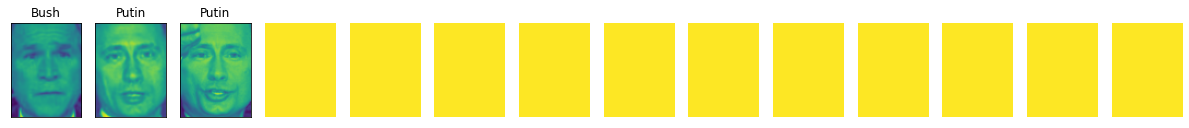

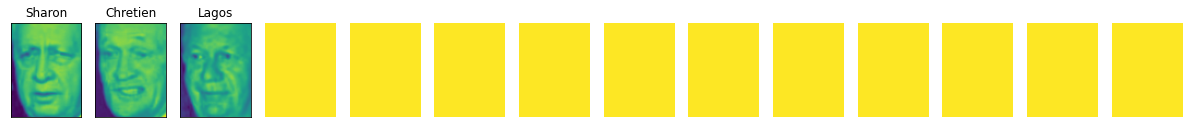

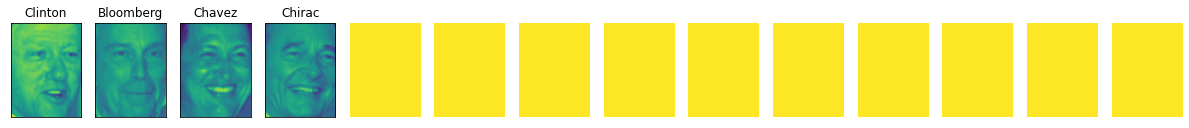

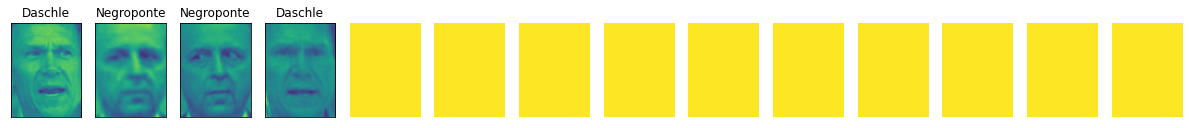

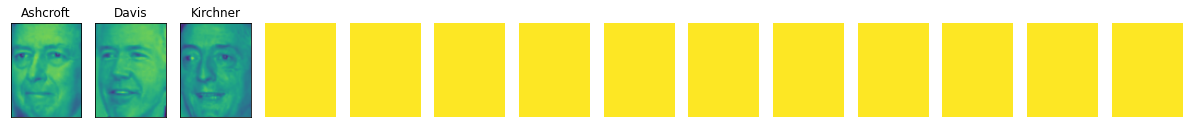

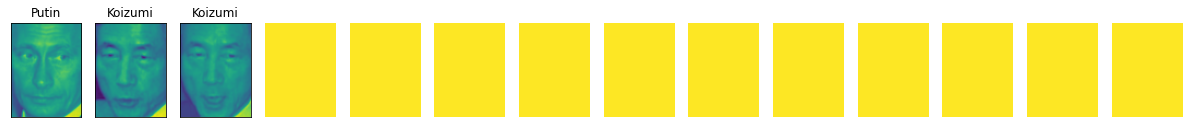

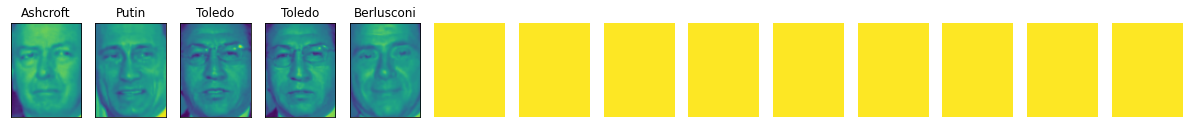

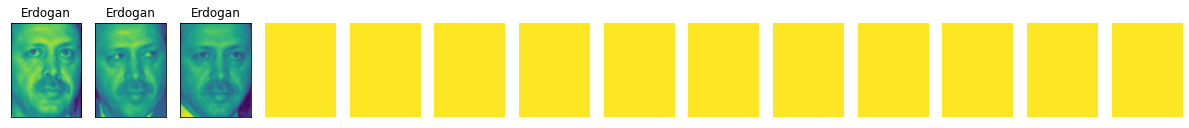

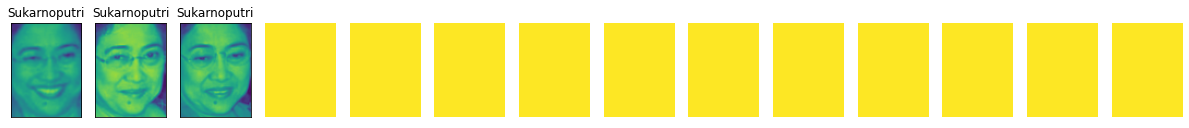

In [22]:
# labels : 만들어진 그룹

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
        
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')


In [23]:
from sklearn.cluster import KMeans


In [25]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기: {}".format(np.bincount(labels_km)))


k-평균의 클러스터 크기: [280 226 104 268 152 326 203 208 207  89]


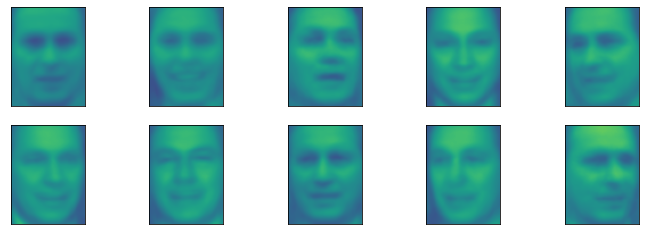

In [26]:
fig, axes = plt.subplots(2, 5, 
                         subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))

for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)


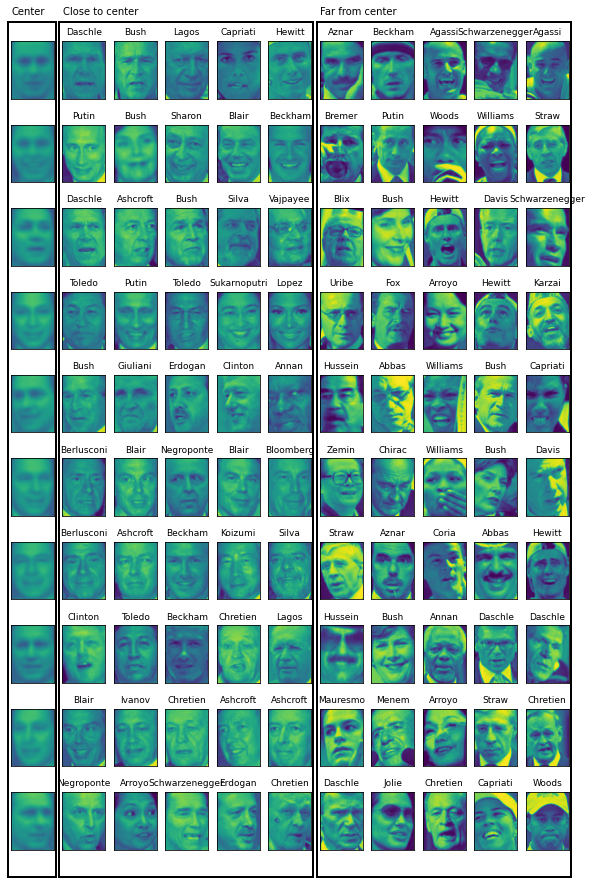

In [27]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)


In [28]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.preprocessing import StandardScaler    # 표준화
from sklearn.metrics.cluster import adjusted_rand_score


In [29]:
### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)


In [30]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
print(X.shape, y.shape)
print(X[1:15], y[1:15])
print(np.mean(X))
print(np.std(X))


(200, 2) (200,)
[[ 1.61859642 -0.37982927]
 [-0.02126953  0.27372826]
 [-1.02181041 -0.07543984]
 [ 1.76654633 -0.17069874]
 [ 1.8820287  -0.04238449]
 [ 0.97481551  0.20999374]
 [ 0.88798782 -0.48936735]
 [ 0.89865156  0.36637762]
 [ 1.11638974 -0.53460385]
 [-0.36380036  0.82790185]
 [ 0.24702417 -0.23856676]
 [ 1.81658658 -0.13088387]
 [ 1.2163905  -0.40685761]
 [-0.8236696   0.64235178]] [1 1 0 1 1 0 1 0 1 0 1 1 1 0]
0.37434879176820846
0.7188000865361358


In [31]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[1:15]

print(X_scaled.shape)               # 조정된 스케일
print(np.std(X), np.std(X_scaled))  # 표준편차 
print(np.var(X), np.var(X_scaled))  # 분산 
print(np.mean(X[:,0]), "{:.5f}".format( np.mean(X_scaled[:,0]) ) )
print(np.mean(X[:,1]), "{:.5f}".format( np.mean(X_scaled[:,1]) ) )


(200, 2)
0.7188000865361358 1.0
0.5166735644043563 1.0
0.4964808628141405 0.00000
0.25221672072227647 -0.00000


In [32]:
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '스케일된 데이터')

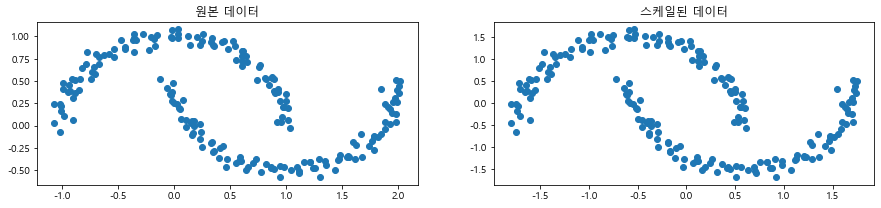

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15,3) )

# 무작위로 할당한 클러스터를 그린다.
axes[0].scatter(X[:,0], X[:,1])
axes[0].set_title("원본 데이터")

# 무작위로 할당한 클러스터를 그린다.
axes[1].scatter(X_scaled[:,0], X_scaled[:,1])
axes[1].set_title("스케일된 데이터")

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [35]:
# 사용할 알고리즘 모델의 리스트를 만들기
algorithms = [KMeans(n_clusters=2), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터를 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

random_clusters


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0])

Text(0.5, 1.0, '무작위 할당 - ARI:0.00')

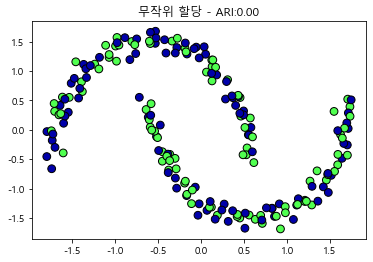

In [36]:
print(mglearn.cm3)
plt.scatter(X_scaled[:,0], 
                X_scaled[:,1], 
                c=random_clusters,       
                cmap=mglearn.cm3, 
                s=60,                    # 점 크기
                edgecolors='black')

plt.title("무작위 할당 - ARI:{:.2f}".format(adjusted_rand_score(y, random_clusters)))


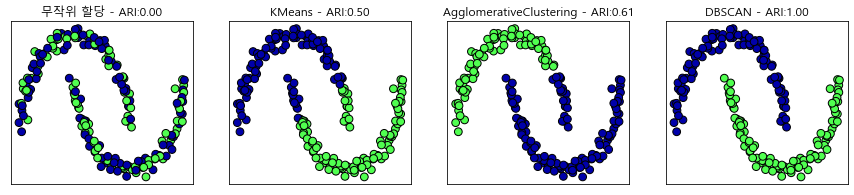

In [37]:
# from sklearn.metrics.cluster import adjusted_rand_score
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                        subplot_kw = {'xticks':(), 'yticks':()})

# 무작위로 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:,0], 
                X_scaled[:,1], 
                c=random_clusters,       
                cmap=mglearn.cm3, 
                s=60,                    # 점 크기
                edgecolors='black')

axes[0].set_title("무작위 할당 - ARI:{:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그린다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,
               cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__,
                                               adjusted_rand_score(y, clusters)))


In [38]:
### 실제 예
from sklearn.metrics import accuracy_score

clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]

# 모든 레이블이 달라졌으므로 정확도는 0이다.
print("정확도 : {:.2f}".format(accuracy_score(clusters1, clusters2)))

# 같은 포인트가 한 클러스터에 모였으므로 ARI는 1이다.
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))


정확도 : 0.00
ARI: 1.00


In [39]:
from sklearn.metrics.cluster import silhouette_score


In [40]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [41]:
# 사용할 알고리즘 모델의 리스트를 만들기
algorithms = [KMeans(n_clusters=2), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터를 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))


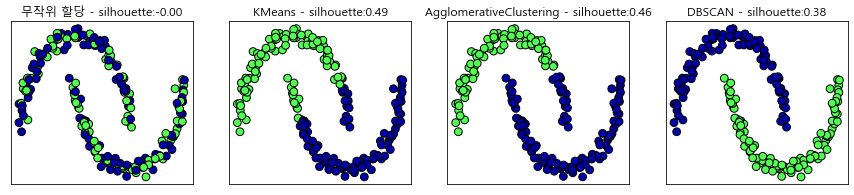

In [42]:
# from sklearn.metrics.cluster import adjusted_rand_score
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                        subplot_kw = {'xticks':(), 'yticks':()})

# 무작위로 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:,0], 
                X_scaled[:,1], 
                c=random_clusters,       
                cmap=mglearn.cm3, 
                s=60,                    # 점 크기
                edgecolors='black')

# 실루엣 스코어
axes[0].set_title("무작위 할당 - silhouette:{:.2f}".format(silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그린다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,
               cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} - silhouette:{:.2f}".format(algorithm.__class__.__name__,
                                               silhouette_score(X_scaled, clusters)))


In [43]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np


In [45]:
cancer = load_breast_cancer()
print(cancer.data.shape)


(569, 30)


In [46]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 40))
noise.shape

(569, 40)

In [49]:
X_w_noise = np.hstack([cancer.data, noise])
X_w_noise.shape

(569, 70)

In [65]:
X = X_w_noise
y = cancer.target

X_train,X_test, y_train, y_test = train_test_split(X, y,
                                                  random_state=0,
                                                  test_size=0.5)

In [66]:
select = SelectPercentile(score_func=f_classif, percentile = 50)
select.fit(X_train, y_train)
X_tr_selected = select.transform(X_train)
X_tr_selected.shape

(284, 35)

In [67]:
import matplotlib.pyplot as plt


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False False
 False False  True False False False False False  True False False False
 False False False False  True False False False False  True False False
  True False False False  True False False False  True  True]


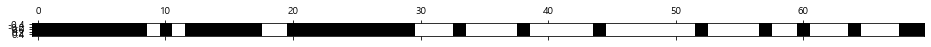

In [68]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')


In [69]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환 
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_train, y_train)))
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test, y_test)))


전체 특성 사용 : 0.961
전체 특성 사용 : 0.940


In [70]:
# 테스트 데이터 변환 
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_tr_selected, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_tr_selected, y_train)))
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test_selected, y_test)))


전체 특성 사용 : 0.958
전체 특성 사용 : 0.923


### 변수 퍼센트 30, 70%로 변경해보고 점수 확인해보기

30%활용 : 
일부 특성 사용 : 0.961
전체 특성 사용 : 0.947
70%활용 : 
일부 특성 사용 : 0.961
전체 특성 사용 : 0.930


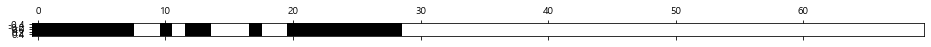

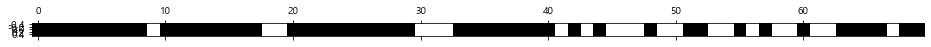

In [71]:
rate_list = [30, 70]

for rate in rate_list:
    select = SelectPercentile(score_func=f_classif, percentile = rate)
    select.fit(X_train, y_train)
    X_tr_selected = select.transform(X_train)
    mask = select.get_support()
#print(mask)
    plt.matshow(mask.reshape(1, -1), cmap='gray_r')
    lr = LogisticRegression()
    lr.fit(X_tr_selected, y_train)
    
    X_test_selected = select.transform(X_test)
    print("{}%활용 : ".format(rate))
    print("일부 특성 사용 : {:.3f}".format(lr.score(X_tr_selected, y_train)))
    print("전체 특성 사용 : {:.3f}".format(lr.score(X_test_selected, y_test)))